In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/zhichengliu/Desktop/Valar.Ga/Self_Learning.nosync/数据/Udemy/Python/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/gene_expression.csv')
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

(4.0, 8.0)

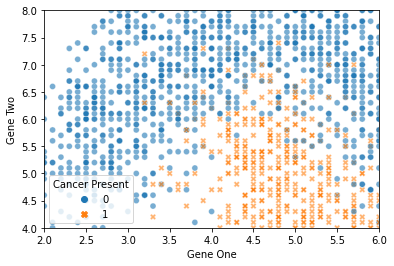

In [16]:
sns.scatterplot(data=df, x= 'Gene One', y = 'Gene Two',
               hue = 'Cancer Present', alpha = 0.6, style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

In [13]:
len(df)

3000

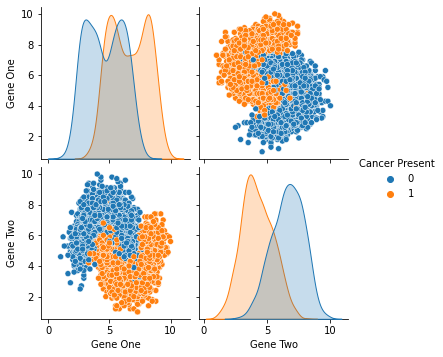

In [17]:
sns.pairplot(data=df,hue = 'Cancer Present')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import StandardScaler

In [22]:
X = df.drop('Cancer Present', axis = 1)

In [23]:
y = df['Cancer Present']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
scaler =  StandardScaler()

In [26]:
scaled_X_train = scaler.fit_transform(X_train)

In [27]:
scaled_X_test = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#help(KNeighborsClassifier)

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_pred = knn_model.predict(scaled_X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]])

In [42]:
len(y_test)

900

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [44]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

0.8922222222222222

In [53]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [55]:
#test_error_rates

Text(0.5, 0, 'K Neighbor')

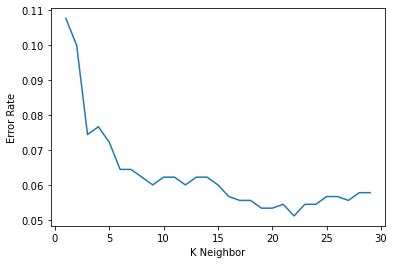

In [56]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbor')

In [57]:
#PIPELINE --> GRIDSEARCH CV

In [58]:
scaler = StandardScaler()

In [59]:
knn = KNeighborsClassifier()

In [60]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
operations = [('scaler',scaler),('knn',knn)]

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline(operations)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
k_values = list (range(1,20))

In [66]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [68]:
param_grid={'knn__n_neighbors':k_values}  

In [70]:
#help(knn)

In [72]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring = 'accuracy')

In [73]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [74]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [76]:
full_pred = full_cv_classifier.predict(X_test)

In [77]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [78]:
new_patient = [[3.8,6.4]]

In [79]:
full_cv_classifier.predict(new_patient)

array([0])

In [80]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])

In [162]:
a = [[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ')]]

In [163]:
len(a[0])-1

11

In [164]:
a[0][1]

('Fulton', 'NOUN')

In [165]:
a[0][0][1]

'DET'

In [192]:
def get_word_tag(a):
    word_x = []
    word_y = []
    for i in range(len(a[0])):
        for j in range(len(a[0][i])):
            word_x.append(a[i][j][0])
            word_y.append(a[i][j][1])
            i = i+1
            j = j=1
        return word_x

In [193]:
get_word_tag(a)

IndexError: list index out of range

In [ ]:
def get_word_tag(sent):
    word_x = []
    word_y = []
    for i in range(len(sent)):
        for j in range(len(sent[i])):
            word_x.append(sent[i][j][0])
            word_y.append(sent[i][j][1])
        return word_x, word_y